In [1]:
import Pkg; 

if split(pwd(),"/")[end] == "hmc"
    cd(joinpath(@__DIR__, "../../../"))
    Pkg.activate("Project.toml")
end

using MorphoMol

using CairoMakie
using Distances
using LinearAlgebra
using Random
using Rotations
using StaticArrays

  Activating project at `~/Doktor/Code/MorphoMol/MorphoMolNotebooks`
Precompiling MorphoMol
  ✓ MorphoMol
  1 dependency successfully precompiled in 3 seconds. 258 already precompiled.
[ Info: Precompiling MorphoMol [85e20460-a9b2-48f6-9df6-e154e9748d83]
[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]


In [2]:
T = 0.5
ε = 0.1
L = 10
β = 1.0 / T

σ = 1.0
Σ = [σ]

energy(x) = x[1]^2, Dict{String, Any}()

function energy_gradient!(∇E, x)
    ∇E[1] = 2 * x[1]
    ∇E
end

output = Dict{String, Vector}(
    "states" => Vector{Vector{Float64}}([]),
    "Es" => Vector{Float64}([]),
    "αs" => Vector{Float64}([]) #Acceptance rates
)

hmc = MorphoMol.Algorithms.HamiltonianMonteCarlo(energy, energy_gradient!, MorphoMol.Algorithms.standard_leapfrog!, β, L, ε, Σ)

x = rand(1) .- 0.5
simulation_time_minutes = 0.5

MorphoMol.Algorithms.simulate!(hmc, x, simulation_time_minutes, output);
output["αs"][end]

0.9849154245594153

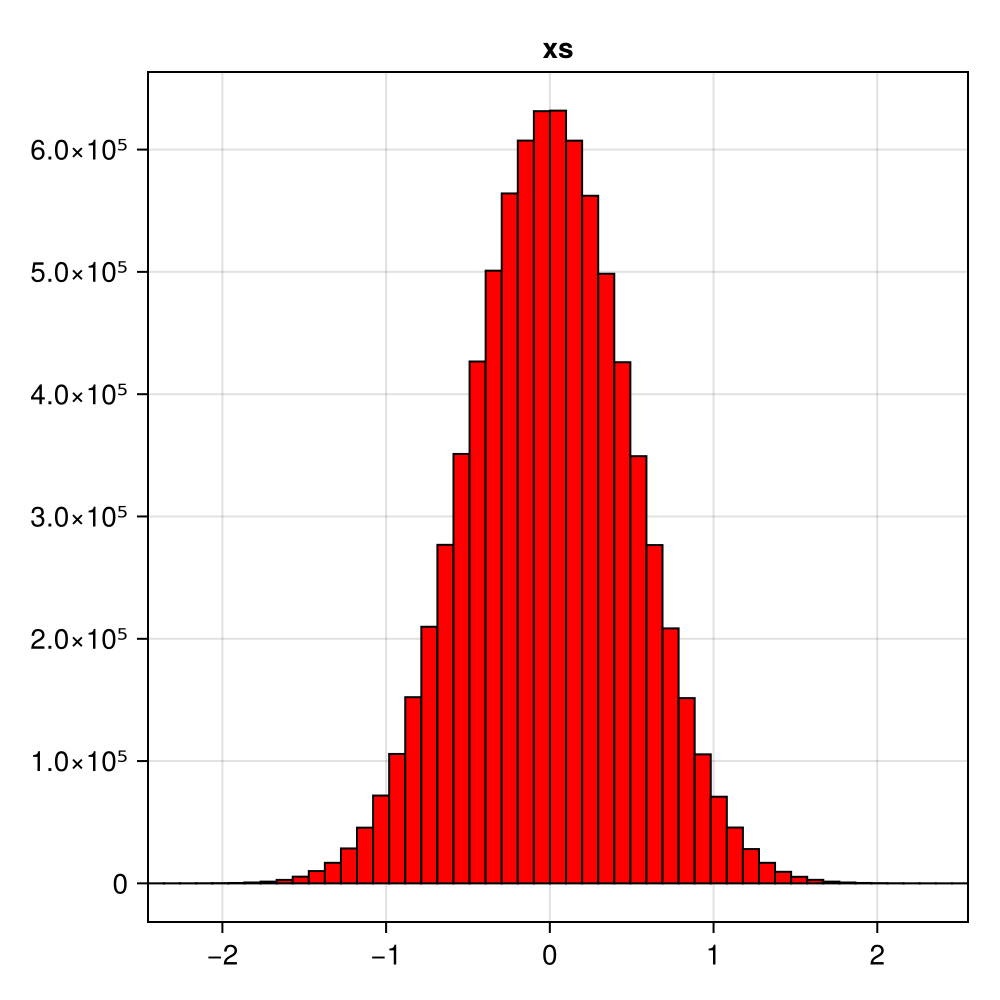

In [3]:
f = Figure(size = (500, 500))
bin_number = 51
xs = [e[1] for e in output["states"]]
hist(f[1, 1], xs, bins = bin_number, color = :red, strokewidth = 1, strokecolor = :black, axis = (title = "xs", limits = ((minimum(xs), maximum(xs)), nothing),))
f